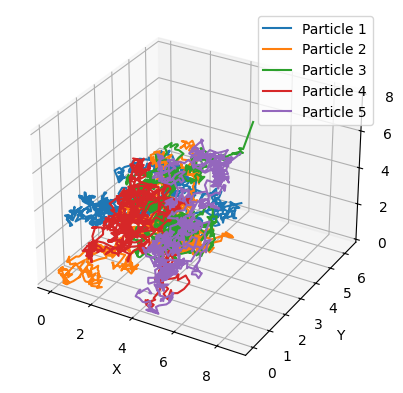

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define container boundaries
def define_boundaries(xmin, xmax, ymin, ymax, zmin, zmax):
    boundaries = {
        "x_surfaces": [(xmin, ymin, zmin), (xmin, ymax, zmin), (xmin, ymin, zmax), (xmin, ymax, zmax)],
        "y_surfaces": [(xmin, ymin, zmin), (xmax, ymin, zmin), (xmin, ymin, zmax), (xmax, ymin, zmax)],
        "z_surfaces": [(xmin, ymin, zmin), (xmax, ymin, zmin), (xmin, ymax, zmin), (xmax, ymax, zmin)],
        "edges": [(xmin, ymin, zmin), (xmax, ymin, zmax), (xmin, ymax, zmax), (xmax, ymax, zmin)],
        "corners": [(xmin, ymin, zmin), (xmax, ymin, zmin), (xmin, ymax, zmin), (xmax, ymax, zmin), (xmin, ymin, zmax), (xmax, ymax, zmax)]
    }
    return boundaries

def simulate_brownian_motion(boundaries, positions, velocities, time_steps, dt, collision_diameter):
    paths = []                                      # store paths for all particles
    for i in range(len(positions)):                 # loop through each particle
        path = np.zeros((time_steps + 1, 3))

        # Current particle
        path[0] = positions[i]
        velocity = velocities[i]

        for t in range(time_steps):

            # Random displacement like collisions between particles in a real gas
            displacement = np.random.randn(3) * np.sqrt(2 * dt)
            new_position = path[t] + velocity * dt + displacement

            # Check for collisions with boundaries (and reflect properly)
            for j in range(3):                      # each dimension separately checked
                
                if new_position[j] < 0:
                    new_position[j] = 0             # adjust position to be on boundary
                    normal = np.zeros(3)
                    normal[j] = 1                   # normal vector
                    velocity = velocity - 2 * np.dot(velocity, normal) * normal
                elif new_position[j] > 5:           # boundaries hardcoded here...
                    new_position[j] = 5
                    normal = np.zeros(3)
                    normal[j] = -1
                    velocity = velocity - 2 * np.dot(velocity, normal) * normal
                '''
                if j == 0:                          # x dimension
                    min_val, max_val = boundaries["x_surfaces"][0][j], boundaries["x_surfaces"][1][j]
                elif j == 1:                        # y dimension
                    min_val, max_val = boundaries["y_surfaces"][0][j], boundaries["y_surfaces"][1][j]
                else:                               # z dimension
                    min_val, max_val = boundaries["z_surfaces"][0][j], boundaries["z_surfaces"][1][j]

                if new_position[j] < min_val:
                    new_position[j] = min_val       # adjust position to be on boundary
                    normal = np.zeros(3)
                    normal[j] = 1                   # normal vector
                    velocity = velocity - 2 * np.dot(velocity, normal) * normal
                elif new_position[j] > max_val:
                    new_position[j] = max_val
                    normal = np.zeros(3)
                    normal[j] = -1
                    velocity = velocity - 2 * np.dot(velocity, normal) * normal
                '''

            path[t + 1] = new_position

        paths.append(path)

    return paths


# Plot 3D paths of particles
def plot_particle_paths(boundaries, paths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, path in enumerate(paths):
        ax.plot(path[:, 0], path[:, 1], path[:, 2], label=f"Particle {i+1}")

    for surface in boundaries["x_surfaces"]:
        ax.plot([surface[0], surface[0]], [surface[1], surface[1]], [surface[2], surface[2]], color='gray')
    for surface in boundaries["y_surfaces"]:
        ax.plot([surface[0], surface[0]], [surface[1], surface[1]], [surface[2], surface[2]], color='gray')
    for surface in boundaries["z_surfaces"]:
        ax.plot([surface[0], surface[0]], [surface[1], surface[1]], [surface[2], surface[2]], color='gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

# Actually using the code (random initial positions and velocities)
boundaries = define_boundaries(0, 5, 0, 5, 0, 5)    # must match numbers in simulate_brownian_motion()
positions = np.random.rand(5, 3) * 9                # 5 particles
velocities = np.random.randn(5, 3)
collision_diameter = 1                              # set a collision diameter for particles for particle-particle collisions
paths = simulate_brownian_motion(boundaries, positions, velocities, 1000, 0.01, collision_diameter)
plot_particle_paths(boundaries, paths)

In [2]:
# add collision between particles... use "collision_diameter"
# container boundaries accidentally hardcoded... figure out a way to generalise container boundaries
# fix axes limits and figure out why "for surface in boundaries["x_surfaces"]" doesn't do anything
# figure out why particles shoot off in straight lines at either start or end of their paths (plot initial positions)
# MAYBE make it possible for non-cubic container